<a href="https://colab.research.google.com/github/ken-6197/CNN-Handwritten-Digit_Recognizer/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [3]:
import tensorflow as tf

In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
# unpacking the datasets into train and test datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
!pip install matplotlib

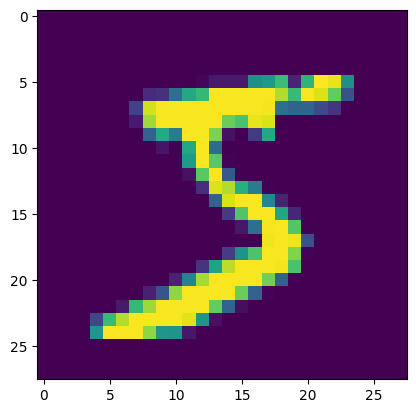

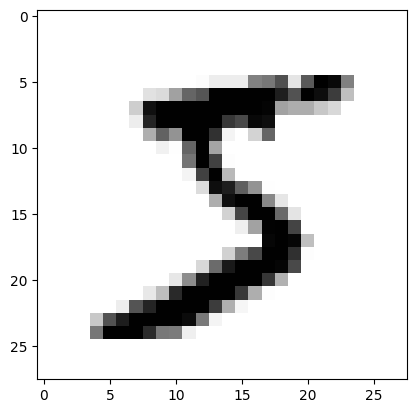

In [10]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [11]:
print(x_train[0])  #before normalization

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

Normalizing the data | Pre-Processing step

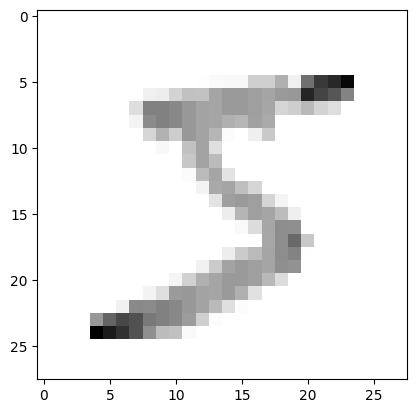

In [13]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [14]:
print(x_train[0])  #after normalization

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [15]:
print(y_train[0]) #check that we have labels inside our network

5


In [16]:
!pip install numpy

Resizing image to make it suitable for apply convolution operation

In [18]:
import numpy as np
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  #increasing one dimension for kernel operation
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Training samples dimension", x_trainr.shape)
print("Testing samples dimension", x_testr.shape)

Training samples dimension (60000, 28, 28, 1)
Testing samples dimension (10000, 28, 28, 1)


### **Creating a Deep Neural Network**
Training on 60,000 samples of MNIST handwritten dataset

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [25]:
# Creating a neural network
model = Sequential()

#First convolution layer
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:]))  #only for first convolution layer to mention input layer size
model.add(Activation("relu"))  #activation function
model.add(MaxPooling2D(pool_size = (2,2))) #maxpooling

#Second convolution layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

#Third convolution layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

#Fully connected layer #1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

#Fully connected layer #2
model.add(Dense(32))
model.add(Activation("relu"))

#Last fully connected layer
model.add(Dense(10))
model.add(Activation("softmax"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
print("Total training samples = ", len(x_trainr))

Total training samples =  60000


In [28]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [29]:
model.fit(x_trainr, y_train, epochs = 5, validation_split = 0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7845 - loss: 0.6330 - val_accuracy: 0.9600 - val_loss: 0.1254
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9659 - loss: 0.1095 - val_accuracy: 0.9737 - val_loss: 0.0868
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9759 - loss: 0.0767 - val_accuracy: 0.9786 - val_loss: 0.0741
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9831 - loss: 0.0551 - val_accuracy: 0.9799 - val_loss: 0.0669
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9861 - loss: 0.0438 - val_accuracy: 0.9831 - val_loss: 0.0559


In [30]:
#Evaluating on testing dataset MNIT
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test loss on 10000 test samples", test_loss)
print("Validation Accuracy on 10000 test samples", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9816 - loss: 0.0708
Test loss on 10000 test samples 0.056545794010162354
Validation Accuracy on 10000 test samples 0.9843999743461609


In [31]:
predictions = model.predict(x_testr)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [32]:
print(predictions)

[[2.73691771e-08 3.58595389e-06 5.19756259e-06 ... 9.99971867e-01
  9.40369347e-08 2.30491906e-07]
 [1.71549505e-06 1.60645556e-07 9.99993682e-01 ... 1.00778315e-07
  1.68999259e-06 3.82901888e-08]
 [1.08779102e-06 9.99946475e-01 3.03717047e-06 ... 1.28739202e-06
  3.10429459e-06 9.66409402e-07]
 ...
 [2.21314114e-08 5.45862626e-08 1.62417095e-07 ... 3.16978685e-07
  3.34370270e-05 1.06469481e-04]
 [3.73139051e-06 2.67521849e-09 8.49384313e-11 ... 1.50704427e-08
  2.52242298e-05 1.62107949e-06]
 [7.82506049e-06 6.59321486e-08 6.47503930e-06 ... 5.46127499e-09
  4.25435283e-05 9.82431629e-07]]


In [33]:
print (np.argmax(predictions[0]))

7


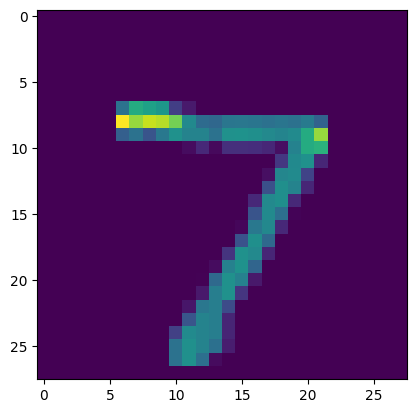

In [34]:
plt.imshow(x_test[0])

In [35]:
print(np.argmax(predictions[128]))

8


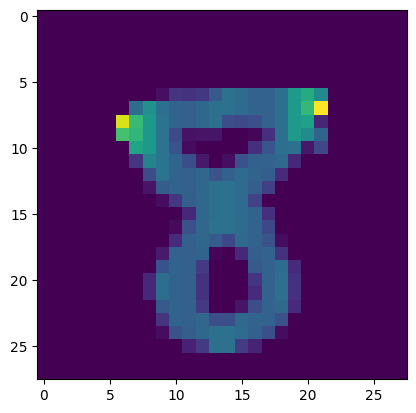

In [36]:
plt.imshow(x_test[128])

In [37]:
!pip install opencv-python

In [41]:
import cv2

In [42]:
from google.colab import files

uploaded = files.upload()


Saving 8.jpg to 8 (1).jpg


In [47]:
img = cv2.imread('8 (1).jpg')


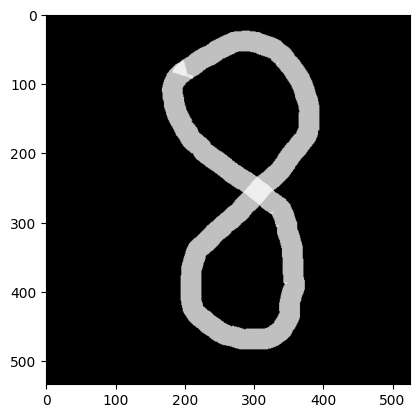

In [48]:
plt.imshow(img)

In [49]:
img.shape

(534, 526, 3)

In [50]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [51]:
gray.shape

(534, 526)

In [53]:
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)

In [54]:
resized.shape

(28, 28)

In [55]:
newing = tf.keras.utils.normalize (resized, axis = 1) #0 to 1 scaling

In [56]:
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [57]:
newing.shape

(1, 28, 28, 1)

In [58]:
predictions = model.predict(newing)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step


In [59]:
print (np.argmax(predictions))

8
